#  Linear Regression on Advertising dataset

## Why do you use Regression Analysis?

Regression analysis estimates the relationship between two or more variables. 


In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score

Let's take a look at some data, ask some questions about that data, and then use Linear regression to answer those questions.

In [2]:
# read data into a DataFrame
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()
data.columns = ['TV','Radio','Newspaper','Sales']

In [5]:
data.head(8)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2


In [8]:
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [57]:
#22.1 (units are in thousands)....22100

In [4]:
data.shape

(200, 4)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [20]:
data.TV.skew(), data.Radio.skew(), data.Newspaper.skew(), data.Sales.skew()

(-0.06985336213274573,
 0.09417463149664404,
 0.8947204074986175,
 0.4075714250767127)

In [64]:
data.TV.kurtosis(), data.TV.skew()

(-1.2264948242299691, -0.06985336213274573)

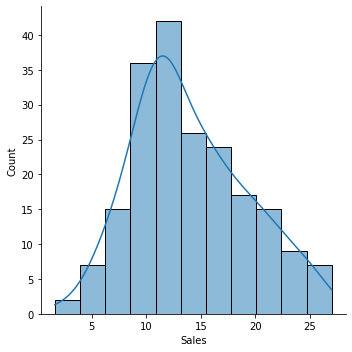

In [18]:
import seaborn as sns
sns.displot(data["Sales"], kde=True)

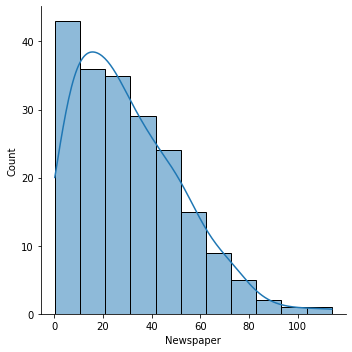

In [21]:
sns.displot(data["Newspaper"], kde=True)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

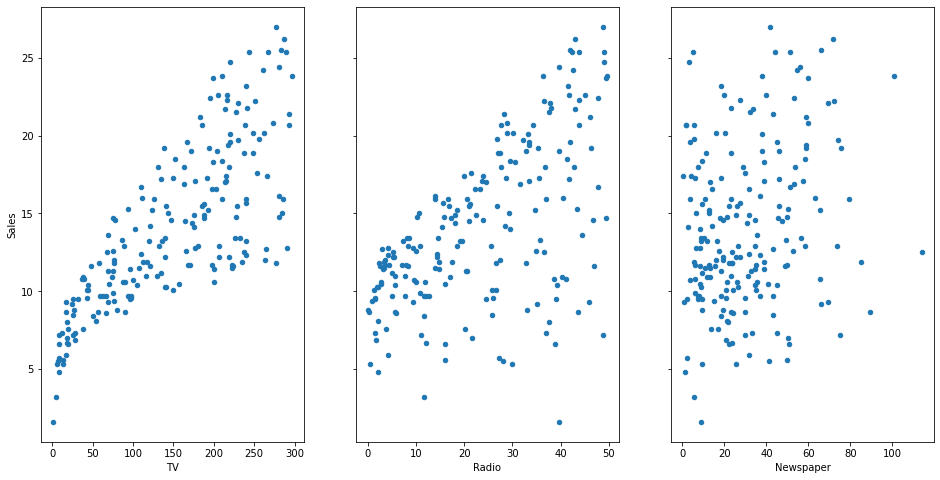

In [23]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

In [24]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## Questions About the Advertising Data

On the basis of this data, how should you spend advertising money in the future?
These general questions might lead you to more specific questions:

1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending, can sales be predicted?

Exploring these questions below.

In [66]:
X = data[["TV"]]
y = data["Sales"]

In [17]:
# import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from math import sqrt

In [70]:
#RMSE --- sqrt(mean_squared_error)

In [74]:
# build model
lr_model = LinearRegression()
# y_pred = w0 + w1*X
lr_model.fit( X, y )

LinearRegression()

In [75]:
# show the weights
lr_model.intercept_, lr_model.coef_

# y_pred = 7.03 + 0.0475*X

(7.0325935491276965, array([0.04753664]))

In [76]:
# predict using the model
y_preds = lr_model.predict( X ) 

In [78]:
y[0:10], y_preds[0:10]

(1     22.1
 2     10.4
 3      9.3
 4     18.5
 5     12.9
 6      7.2
 7     11.8
 8     13.2
 9      4.8
 10    10.6
 Name: Sales, dtype: float64,
 array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
         7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431]))

In [81]:
# print error metrics
print("RMSE:", sqrt(mean_absolute_error(  y ,y_preds )))
print("MAE:", mean_absolute_error(y, y_preds))
print("MAPE:", mean_absolute_percentage_error(y,y_preds)*100)

RMSE: 1.5968112095446618
MAE: 2.549806038927486
MAPE: 20.576595439207786


In [50]:
# predict for a particular budget 
#X_new = pd.DataFrame({'TV': [50]})
#lin_reg.predict(X_new)

In [6]:
# create X and y
#taking only one variable for now
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.0325935491276965
[0.04753664]


## Interpreting Model Coefficients

How do you interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending was **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads was **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. How would you predict the sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [126]:
# manually calculate the prediction
((7.032594 + 0.047537*51) - (7.032594 + 0.047537*50)) * 1000

47.536999999998386

Thus, you would predict Sales of **9,409 widgets** in that market.

In [20]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [21]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([9.40942557])

## Plotting the Least Squares Line

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

In [4]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [7]:
# make predictions for those x values and store them
#X_new = X
#preds = lm.predict(X_new)
#preds
preds = lm.predict(X)

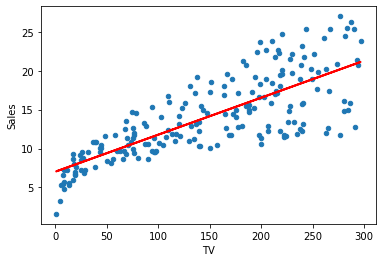

In [8]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(np.array(X), np.array(preds), c='red', linewidth=2)

# Try Multiple Linear Regression

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$



In [28]:
X = data[["TV", "Radio", "Newspaper"]]
y = data["Sales"]

In [32]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test , y_train, y_test = train_test_split( X, y , test_size=0.2)

In [40]:
X_test

,TV,Radio,Newspaper
39,43.1,26.7,35.1
10,199.8,2.6,21.2
35,95.7,1.4,7.4
167,17.9,37.6,21.6
1,230.1,37.8,69.2
116,75.1,35.0,52.7
4,151.5,41.3,58.5
24,228.3,16.9,26.2
2,44.5,39.3,45.1
100,135.2,41.7,45.9


In [87]:
# build, predict, errors 

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
LR_Model1 = LinearRegression() 

In [43]:
LR_Model1.fit(  X_train, y_train )

LinearRegression()

In [44]:
LR_Model1.intercept_, LR_Model1.coef_

(3.0149016321239177, array([ 0.04717818,  0.1807412 , -0.00141578]))

In [48]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50], "Radio":[90], "Newspaper":[10]})
X_new.head()

,TV,Radio,Newspaper
0,50,90,10


In [49]:
LR_Model1.predict( X_new )

array([21.62636088])

In [52]:
#X_test, y_test

In [54]:
y_test_preds = LR_Model1.predict( X_test )

In [55]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [60]:
print("MAE on test:",mean_absolute_error( y_test, y_test_preds  ))

MAE on test: 1.267197648589864


In [58]:
y_train_preds = LR_Model1.predict(X_train)

In [61]:
print("MAE on train:",mean_absolute_error(y_train, y_train_preds))

MAE on train: 1.2491219435199723


In [122]:
# build, predict, errors 

# Statistics Approach : smf.ols model 

In [83]:
from statsmodels.formula.api import ols

In [107]:
lm = ols(formula='Sales ~ TV ', data=data).fit()

train_preds = lm.predict(X_train)
test_preds = lm.predict(X_test)

In [108]:
train_preds = lm.predict(X_train)
test_preds = lm.predict(X_test)

In [96]:
print("MSE on train:", mean_squared_error(y_train, train_preds))
print("MSE on test:", mean_squared_error(y_test, test_preds))

print("RMSE on train:", sqrt(mean_squared_error(y_train, train_preds)))
print("RMSE on test:", sqrt(mean_squared_error(y_test, test_preds)))

print("MAE on train:", mean_absolute_error(y_train, train_preds))
print("MAE on test:", mean_absolute_error(y_test, test_preds))

print("MAPE on train:", mean_absolute_percentage_error(y_train, train_preds))
print("MAPE on test:", mean_absolute_percentage_error(y_test, test_preds))

print("R2 value:", lm.rsquared)
print("Adj R2 value:", lm.rsquared_adj)

MSE on train: 9.875753392088267
MSE on test: 13.06025100993071
RMSE on train: 3.142571143520583
RMSE on test: 3.6138969285150773
MAE on train: 2.471353261664889
MAE on test: 2.863617147977874
MAPE on train: 0.19015549620087402
MAPE on test: 0.268207787156893
R2 value: 0.611875050850071
Adj R2 value: 0.6099148238341623


In [97]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           1.47e-42
Time:                        17:31:31   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
#H0: no effect of feature on target variable 
#H1: there is an effect of feature variable on target variable

In [109]:
import statsmodels.formula.api as smf


In [13]:
X = data[["TV","Radio","Newspaper"]]
y = data["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=183)

In [115]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
train_preds = lm.predict(X_train)
test_preds = lm.predict(X_test)

In [116]:
print("MSE on train:", mean_squared_error(y_train, train_preds))
print("MSE on test:", mean_squared_error(y_test, test_preds))

print("RMSE on train:", sqrt(mean_squared_error(y_train, train_preds)))
print("RMSE on test:", sqrt(mean_squared_error(y_test, test_preds)))

print("MAE on train:", mean_absolute_error(y_train, train_preds))
print("MAE on test:", mean_absolute_error(y_test, test_preds))

print("MAPE on train:", mean_absolute_percentage_error(y_train, train_preds))
print("MAPE on test:", mean_absolute_percentage_error(y_test, test_preds))

print("R2 value:", lm.rsquared)
print("Adj R2 value:", lm.rsquared_adj)

MSE on train: 2.2344284189612167
MSE on test: 4.9829178967098136
RMSE on train: 1.4948004612526773
RMSE on test: 2.232245035095792
MAE on train: 1.1792578322136376
MAE on test: 1.5430248195807976
MAPE on train: 0.10827497257592174
MAPE on test: 0.2607924642191711
R2 value: 0.8972106381789522
Adj R2 value: 0.8956373316204668


## Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How to test this hypothesis? Intuitively,  reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [118]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           1.58e-96
Time:                        17:44:58   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

In [119]:
lm1 = smf.ols(formula='Sales ~ TV + Radio ', data=data).fit()
train_preds = lm1.predict(X_train)
test_preds = lm1.predict(X_test)

In [120]:
print("MSE on train:", mean_squared_error(y_train, train_preds))
print("MSE on test:", mean_squared_error(y_test, test_preds))

print("RMSE on train:", sqrt(mean_squared_error(y_train, train_preds)))
print("RMSE on test:", sqrt(mean_squared_error(y_test, test_preds)))

print("MAE on train:", mean_absolute_error(y_train, train_preds))
print("MAE on test:", mean_absolute_error(y_test, test_preds))

print("MAPE on train:", mean_absolute_percentage_error(y_train, train_preds))
print("MAPE on test:", mean_absolute_percentage_error(y_test, test_preds))

print("R2 value:", lm.rsquared)
print("Adj R2 value:", lm.rsquared_adj)

MSE on train: 2.233698158380993
MSE on test: 4.988056868166486
RMSE on train: 1.4945561743812084
RMSE on test: 2.233395815382147
MAE on train: 1.1803311727854104
MAE on test: 1.5474111309753733
MAPE on train: 0.10834025041530113
MAPE on test: 0.2608545409278528
R2 value: 0.8972106381789522
Adj R2 value: 0.8956373316204668


If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for TV is far less than 0.05, and so there is a relationship between TV ads and Sales.
Generally the p-value is ignored for the intercept.

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

<img src="images/08_r_squared.png">

You can see that the **blue line** explains some of the variance in the data (R-squared=0.54), the **green line** explains more of the variance (R-squared=0.64), and the **red line** fits the training data even further (R-squared=0.66). (Does the red line look like it's overfitting?)

Let's calculate the R-squared value for the simple linear model:

In [44]:
# print the R-squared value for the model
lm.rsquared

0.611875050850071

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

In [45]:
data["TV_square"] = data.TV ** 2
data.head()

,TV,Radio,Newspaper,Sales,TV_square
1,230.1,37.8,69.2,22.1,52946.01
2,44.5,39.3,45.1,10.4,1980.25
3,17.2,45.9,69.3,9.3,295.84
4,151.5,41.3,58.5,18.5,22952.25
5,180.8,10.8,58.4,12.9,32688.64


# R2 vs Adjusted R2

In [50]:
lm = ols(formula='Sales ~ TV + Radio', data=data).fit()
print("R2 value:", lm.rsquared)
print("Adj R2 value:", lm.rsquared_adj)

R2 value: 0.8971942610828957
Adj R2 value: 0.8961505479974429


In [51]:
lm = ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
print("R2 value:", lm.rsquared)
print("Adj R2 value:", lm.rsquared_adj)

R2 value: 0.8972106381789522
Adj R2 value: 0.8956373316204668


# Regularization

In [9]:
from sklearn.linear_model import Ridge, Lasso


In [9]:
Lasso(alpha=10)

Lasso(alpha=10)

In [10]:
from sklearn.linear_model import LinearRegression

LR_Model1 = LinearRegression()

In [21]:
Lasso_Reg = Lasso(alpha=2)
Lasso_Reg.fit(X_train, y_train)
print("lasso model intercept, co-eff:", Lasso_Reg.intercept_  ,Lasso_Reg.coef_)
#predictions  on test dataset
train_predictions = Lasso_Reg.predict(X_train)
print("RMSE on train:", sqrt(mean_squared_error(y_train, train_predictions)))

test_predictions = Lasso_Reg.predict(X_test)
print("RMSE on test:",sqrt(mean_squared_error(y_test, test_predictions)))


print("MAE on test:",sqrt(mean_absolute_error(y_test, test_predictions)))

lasso model intercept, co-eff: 3.4056588662375713 [0.04371974 0.18106099 0.        ]
RMSE on train: 1.4927750864827116
RMSE on test: 2.2861802262966284
MAE on test: 1.2514325037079006


In [22]:
Ridge_Reg = Ridge(alpha=2)
Ridge_Reg.fit(X_train, y_train)
print("co-eff:",Ridge_Reg.coef_)
#predictions  on test dataset
train_predictions = Ridge_Reg.predict(X_train)
print("RMSE on train:", sqrt(mean_squared_error(y_train, train_predictions)))

test_predictions = Ridge_Reg.predict(X_test)
print("RMSE on test:",sqrt(mean_squared_error(y_test, test_predictions)))


co-eff: [0.04395602 0.19011481 0.00096663]
RMSE on train: 1.4860911025724886
RMSE on test: 2.285385648937447


In [25]:
Ridge_Reg = Ridge(alpha=20)
Ridge_Reg.fit(X_train, y_train)
print("co-eff:",Ridge_Reg.coef_)
#predictions  on test dataset
train_predictions = Ridge_Reg.predict(X_train)
print("RMSE on train:", sqrt(mean_squared_error(y_train, train_predictions)))

test_predictions = Ridge_Reg.predict(X_test)
print("RMSE on test:",sqrt(mean_squared_error(y_test, test_predictions)))

co-eff: [0.04395511 0.18999723 0.0009976 ]
RMSE on train: 1.486092136621675
RMSE on test: 2.2853539909877907


In [26]:
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha': [ 10,20,30,50,70,100,120,150,200 ]}
ridge_regressor=GridSearchCV(ridge, parameters,cv=5)
ridge_regressor.fit(X_train,y_train)
print("Best parameter:", ridge_regressor.best_params_)
print("Best score:",ridge_regressor.best_score_)

Best parameter: {'alpha': 10}
Best score: 0.8914758755893171


In [27]:
ridge=Ridge()
parameters={'alpha': [ 15,16,17,18,19,20,21,22,23,24 ]}
ridge_regressor=GridSearchCV(ridge, parameters,cv=5)
ridge_regressor.fit(X_train,y_train)
print("Best parameter:", ridge_regressor.best_params_)
print("Best score:",ridge_regressor.best_score_)

Best parameter: {'alpha': 15}
Best score: 0.891473961704069


In [74]:
ridge_regressor

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [10, 15, 20]})

In [100]:
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha': [2,5,10, 15, 20,30,40,100]}
lasso_regressor=GridSearchCV(lasso, parameters,cv=5)
lasso_regressor.fit(xtrain,ytrain)
print("Best parameter:", lasso_regressor.best_params_)
print("Best score:",lasso_regressor.best_score_)

Best parameter: {'alpha': 2}
Best score: 0.771312156571249


In [78]:
lasso_regressor

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [2, 5, 10, 15, 20, 30, 40, 100]})

# Statistics Approach

In [43]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           1.58e-96
Time:                        11:54:22   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things you learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus, reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending was **slightly negatively associated** with Sales. (However, this is irrelevant since as you have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

## Feature Selection

How do you decide **what features have to be included** in a linear model? Here's one idea:
- Try different models, and only keep predictors in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new predictors.

What are the **drawbacks** in this approach?
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 predictors to a model that are **pure noise**, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [48]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
predictions = lm.predict(X)
sqrt(mean_squared_error(y, predictions)), mean_absolute_error(y, predictions)

(1.6685701407225697, 1.2520112296870696)

In [47]:
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
predictions = lm.predict(X)
sqrt(mean_squared_error(y, predictions)), mean_absolute_error(y, predictions)

(1.668703059366193, 1.253747164423403)

In [56]:
# only include TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
print("r2:",lm.rsquared, " adj r2:", lm.rsquared_adj)


r2: 0.8971942610828957  adj r2: 0.8961505479974429


In [57]:
# add Newspaper to the model (which has no association with Sales)
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
print("r2:",lm.rsquared, "adj r2:", lm.rsquared_adj)


r2: 0.8972106381789522 adj r2: 0.8956373316204668


**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

So is there a better approach to feature selection? **Cross-validation.** It provides a more reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.

## Handling Categorical Predictors with Two Categories

Up until now, all the predictors have been numeric. What if one of the predictors was categorical?

Let's create a new feature called **Size**, and randomly assign observations to be **small or large**:

In [36]:
import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small' 
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


For scikit-learn, you need to represent all data **numerically**. If the feature only has two categories, you can simply create a **dummy variable** that represents the categories as a binary value:

In [37]:
# create a new Series called IsLarge
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


Let's redo the multiple linear regression and include the **IsLarge** predictor:

In [38]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
zip(feature_cols, lm.coef_)

How do you interpret the **IsLarge coefficient**? For a given amount of TV/Radio/Newspaper ad spending, being a large market was associated with an average **increase** in Sales of 57.42 widgets (as compared to a Small market, which is called the **baseline level**).

What if you had reversed the 0/1 coding and created the feature 'IsSmall' instead? The coefficient would be the same, except it would be **negative instead of positive**. As such, your choice of category for the baseline does not matter, all that changes is your **interpretation** of the coefficient.

## Handling Categorical Predictors with More than Two Categories

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban**:

In [39]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


You have to represent Area numerically, but  can't simply code it as 0=rural, 1=suburban, 2=urban because that would imply an **ordered relationship** between suburban and urban (and thus urban is somehow "twice" the suburban category).

Instead, create **another dummy variable**:

In [41]:
data.Area.value_counts()

suburban    78
urban       63
rural       59
Name: Area, dtype: int64

In [40]:
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]
area_dummies

,Area_suburban,Area_urban
1,0,0
2,0,1
3,0,0
4,0,1
5,1,0
...,...,...
196,1,0
197,0,1
198,1,0
199,0,0


In [42]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


Here is how you interpret the coding:
- **rural** is coded as Area_suburban=0 and Area_urban=0
- **suburban** is coded as Area_suburban=1 and Area_urban=0
- **urban** is coded as Area_suburban=0 and Area_urban=1

Why do you only need **two dummy variables, not three?** Because two dummies capture all of the information about the Area feature, and implicitly defines rural as the baseline level. (In general, if you have a categorical feature with k levels, you create k-1 dummy variables.)

If this is confusing, think about why you only needed one dummy variable for Size (IsLarge), not two dummy variables (IsSmall and IsLarge).

Let's include the two new dummy variables in the model:

In [43]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
print(feature_cols, lm.coef_)

['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]


How do you interpret the coefficients?
- Holding all other variables fixed, being a **suburban** area it is associated with an average **decrease** in Sales of 106.56 widgets (as compared to the baseline level, which is rural).
- Being an **urban** area it is associated with an average **increase** in Sales of 268.13 widgets (as compared to rural).

**A final note about dummy encoding:** If you have categories that can be ranked (strongly disagree, disagree, neutral, agree, strongly agree), you can potentially use a single dummy variable and represent the categories numerically (1, 2, 3, 4, 5).